In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings

In [29]:
rbu = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Rabindra_Bharati_University.csv') 
rbu.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2018-11-06,189.46,226.31,51.60,16.13,25.46,0.85,70.50,29.90,353.43,Very poor
1,2018-11-07,276.07,284.27,50.64,29.52,15.51,1.06,45.31,30.36,420.05,Severe
2,2018-11-08,214.91,365.48,61.60,26.73,21.16,1.31,66.00,30.59,373.01,Very poor
3,2018-11-09,223.99,362.24,54.73,19.99,21.15,1.18,65.90,30.70,379.99,Very poor
4,2018-11-10,188.66,312.49,64.48,19.34,21.28,1.06,40.72,30.76,352.82,Very poor


In [30]:
rbu['Date'] = pd.to_datetime(rbu['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
rbu["month"] = rbu["Date"].dt.month
rbu["week"] = rbu["Date"].dt.strftime('%V').astype('int64')
rbu["week_day"] = rbu["Date"].dt.weekday
rbu.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2018-11-06,189.46,226.31,51.60,16.13,25.46,0.85,70.50,29.90,353.43,Very poor,11,45,1
1,2018-11-07,276.07,284.27,50.64,29.52,15.51,1.06,45.31,30.36,420.05,Severe,11,45,2
2,2018-11-08,214.91,365.48,61.60,26.73,21.16,1.31,66.00,30.59,373.01,Very poor,11,45,3
3,2018-11-09,223.99,362.24,54.73,19.99,21.15,1.18,65.90,30.70,379.99,Very poor,11,45,4
4,2018-11-10,188.66,312.49,64.48,19.34,21.28,1.06,40.72,30.76,352.82,Very poor,11,45,5


In [31]:
rbu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   PM2.5         1517 non-null   float64       
 2   PM10          1517 non-null   float64       
 3   NO2           1517 non-null   float64       
 4   NH3           1517 non-null   float64       
 5   SO2           1517 non-null   float64       
 6   CO            1517 non-null   float64       
 7   Ozone         1517 non-null   float64       
 8   AT            1517 non-null   float64       
 9   AQI           1517 non-null   float64       
 10  AQI_Standard  1517 non-null   object        
 11  month         1517 non-null   int64         
 12  week          1517 non-null   int64         
 13  week_day      1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 166.0+ KB


## KNN Regression

In [32]:
model_knn = KNeighborsRegressor(n_neighbors=5)

### PM 2.5

In [33]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = rbu["month"]
data_pm25["week"] = rbu["week"]
data_pm25["week_day"] = rbu["week_day"]
data_pm25["PM2.5"] = rbu["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,11,45,1,189.46
1,11,45,2,276.07
2,11,45,3,214.91
3,11,45,4,223.99
4,11,45,5,188.66


In [34]:
# shuffling the data set
data_pm25 = shuffle(data_pm25, random_state=1).reset_index(drop=True)
data_pm25.head()

,month,week,week_day,PM2.5
0,3,13,0,36.28
1,11,45,5,10.72
2,10,41,1,96.43
3,8,34,6,17.94
4,6,25,0,29.24


In [35]:
duplicate_pm25 = data_pm25.copy()

In [36]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [37]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [39]:
rbu_pm25_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [40]:
predictions_pm25 = rbu_pm25_knn.predict(X_test)

In [41]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9983037241001455


In [42]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(y_test.shape[0],1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.008697
dtype: float64

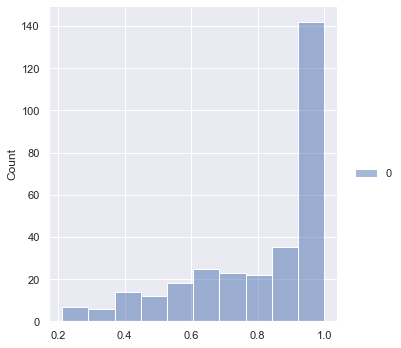

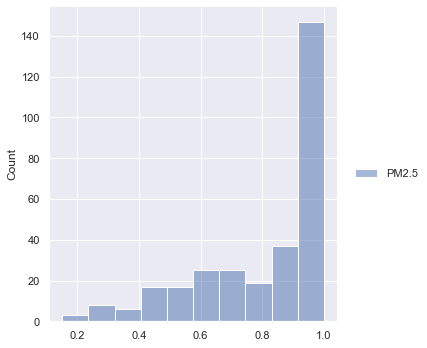

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

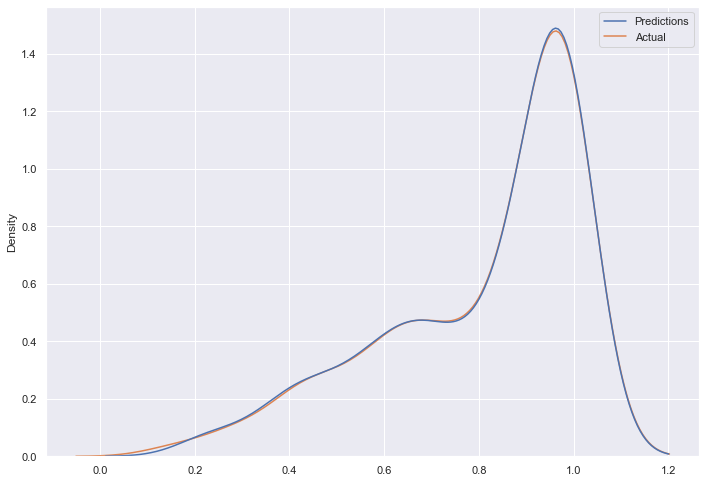

In [44]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [45]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = rbu["month"]
data_pm10["week"] = rbu["week"]
data_pm10["week_day"] = rbu["week_day"]
data_pm10["PM10"] = rbu["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,11,45,1,226.31
1,11,45,2,284.27
2,11,45,3,365.48
3,11,45,4,362.24
4,11,45,5,312.49


In [46]:
# shuffling the data set
data_pm10 = shuffle(data_pm10, random_state=1).reset_index(drop=True)
data_pm10.head()

,month,week,week_day,PM10
0,3,13,0,62.01
1,11,45,5,32.39
2,10,41,1,159.26
3,8,34,6,37.78
4,6,25,0,74.76


In [47]:
duplicate_pm10 = data_pm10.copy()

In [48]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [49]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

In [51]:
rbu_pm10_model_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [52]:
predictions_pm10 = rbu_pm10_model_knn.predict(X_test)

In [53]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.9987487657405297


In [54]:
predictions_pm10.shape

(304,)

In [55]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(y_test.shape[0],1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.00373
dtype: float64

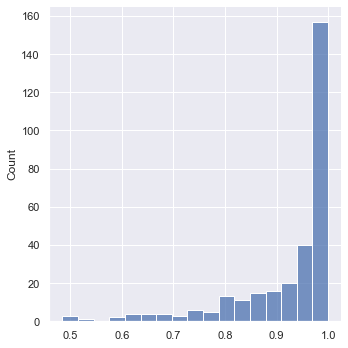

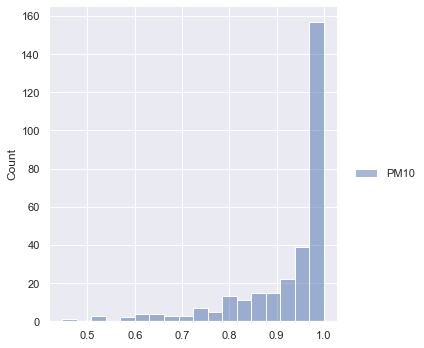

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

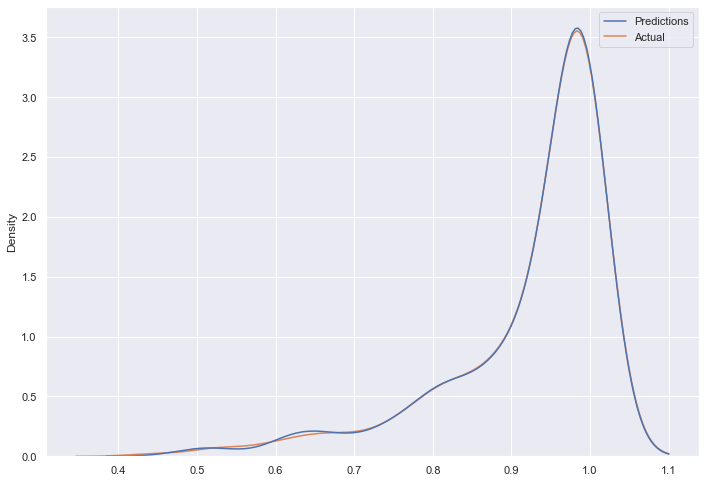

In [57]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [58]:
data_no2 = pd.DataFrame()
data_no2["month"] = rbu["month"]
data_no2["week"] = rbu["week"]
data_no2["week_day"] = rbu["week_day"]
data_no2["NO2"] = rbu["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,11,45,1,51.60
1,11,45,2,50.64
2,11,45,3,61.60
3,11,45,4,54.73
4,11,45,5,64.48


In [59]:
# shuffling the data set
data_no2=shuffle(data_no2, random_state=1).reset_index(drop=True)
data_no2.head()

,month,week,week_day,NO2
0,3,13,0,30.50
1,11,45,5,7.87
2,10,41,1,24.19
3,8,34,6,15.34
4,6,25,0,13.03


In [60]:
duplicate_no2 = data_no2.copy()

In [61]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [62]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

In [64]:
rbu_no2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [65]:
predictions_no2 = rbu_no2_knn.predict(X_test)

In [66]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9985266354387017


In [67]:
predictions_no2.shape

(304,)

In [68]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.009655
dtype: float64

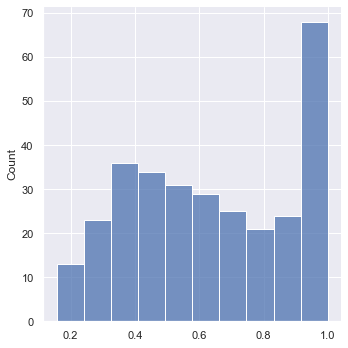

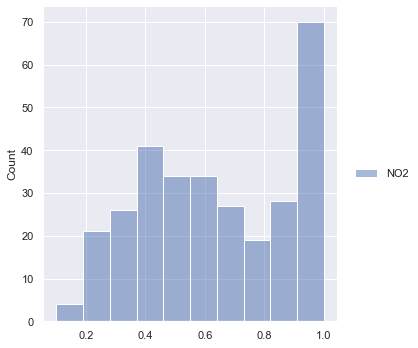

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

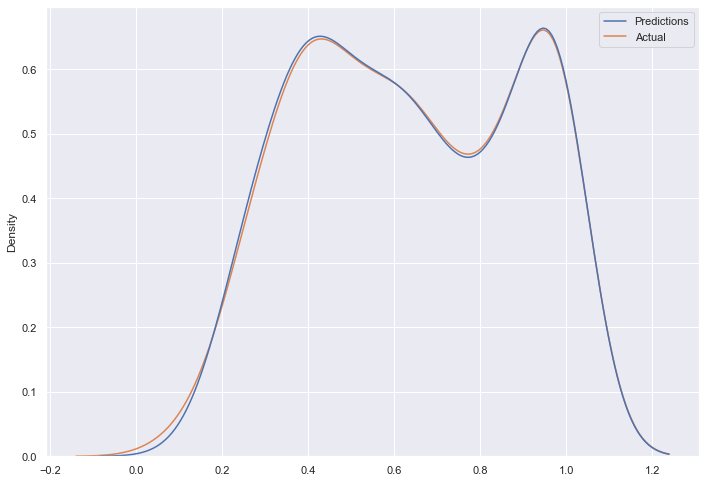

In [70]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [71]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = rbu["month"]
data_nh3["week"] = rbu["week"]
data_nh3["week_day"] = rbu["week_day"]
data_nh3["NH3"] = rbu["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,11,45,1,16.13
1,11,45,2,29.52
2,11,45,3,26.73
3,11,45,4,19.99
4,11,45,5,19.34


In [72]:
# shuffling the data set
data_nh3 = shuffle(data_nh3, random_state=1).reset_index(drop=True)
data_nh3.head()

,month,week,week_day,NH3
0,3,13,0,39.86
1,11,45,5,4.18
2,10,41,1,13.02
3,8,34,6,15.35
4,6,25,0,15.00


In [73]:
duplicate_nh3 = data_nh3.copy()

In [74]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [75]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_nh3, y_nh3, test_size=0.2, random_state=42)

In [77]:
rbu_nh3_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [78]:
predictions_nh3 = rbu_nh3_knn.predict(X_test)

In [79]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9980684750348919


In [80]:
predictions_nh3.shape

(304,)

In [81]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.011957
dtype: float64

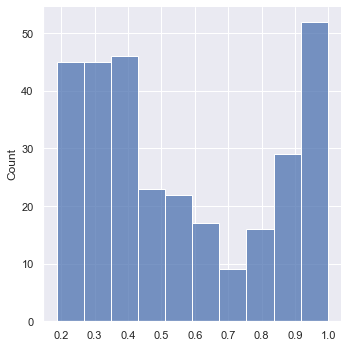

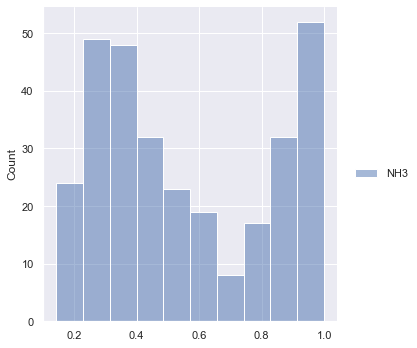

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

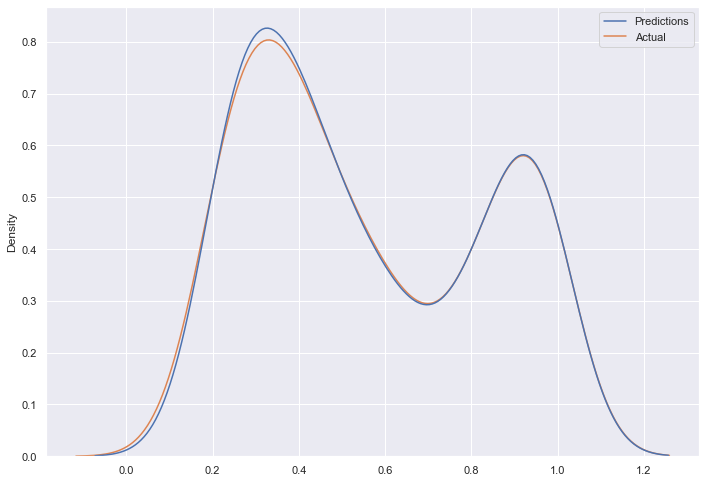

In [83]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [84]:
data_so2 = pd.DataFrame()
data_so2["month"] = rbu["month"]
data_so2["week"] = rbu["week"]
data_so2["week_day"] = rbu["week_day"]
data_so2["SO2"] = rbu["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,11,45,1,25.46
1,11,45,2,15.51
2,11,45,3,21.16
3,11,45,4,21.15
4,11,45,5,21.28


In [85]:
# shuffling the data set
data_so2 = shuffle(data_so2, random_state=1).reset_index(drop=True)
data_so2.head()

,month,week,week_day,SO2
0,3,13,0,13.43
1,11,45,5,13.54
2,10,41,1,13.76
3,8,34,6,10.94
4,6,25,0,11.99


In [86]:
duplicate_so2 = data_so2.copy()

In [87]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [88]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)

In [90]:
rbu_so2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [91]:
predictions_so2 = rbu_so2_knn.predict(X_test)

In [92]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9974392385016219


In [93]:
predictions_so2.shape

(304,)

In [94]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.015421
dtype: float64

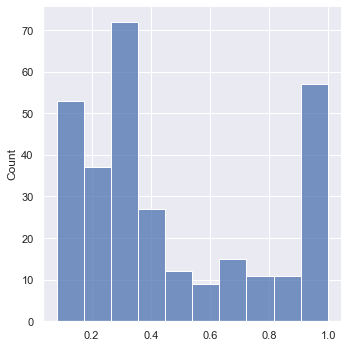

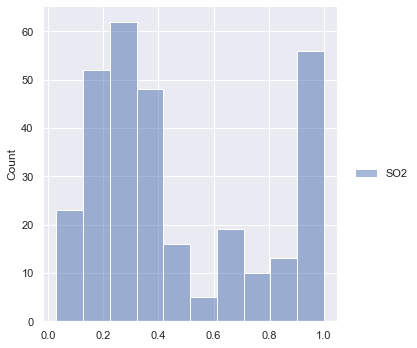

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

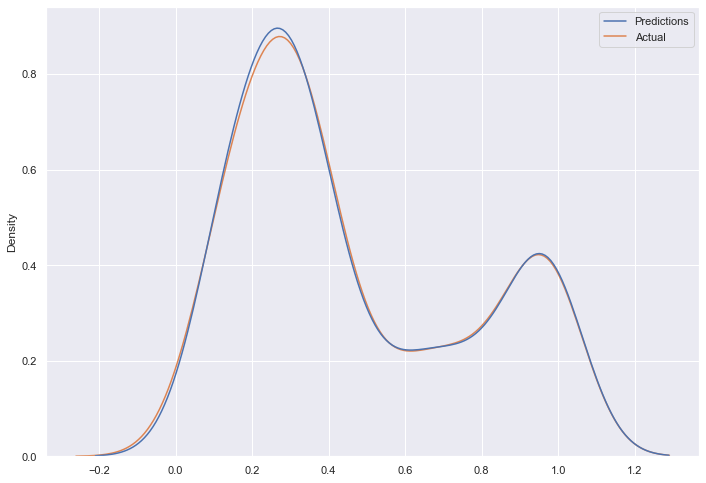

In [96]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [97]:
data_co = pd.DataFrame()
data_co["month"] = rbu["month"]
data_co["week"] = rbu["week"]
data_co["week_day"] = rbu["week_day"]
data_co["CO"] = rbu["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,11,45,1,0.85
1,11,45,2,1.06
2,11,45,3,1.31
3,11,45,4,1.18
4,11,45,5,1.06


In [98]:
# shuffling the data set
data_co = shuffle(data_co, random_state=1).reset_index(drop=True)
data_co.head()

,month,week,week_day,CO
0,3,13,0,0.27
1,11,45,5,0.22
2,10,41,1,0.64
3,8,34,6,0.31
4,6,25,0,0.41


In [99]:
duplicate_co = data_co.copy()

In [100]:
#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)

In [101]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

In [103]:
rbu_co_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [104]:
predictions_co = rbu_co_knn.predict(X_test)

In [105]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.7300738136127569


In [106]:
predictions_so2.shape

(304,)

In [107]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.479806
dtype: float64

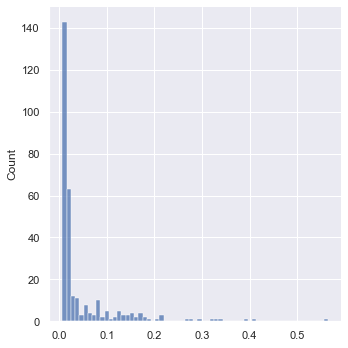

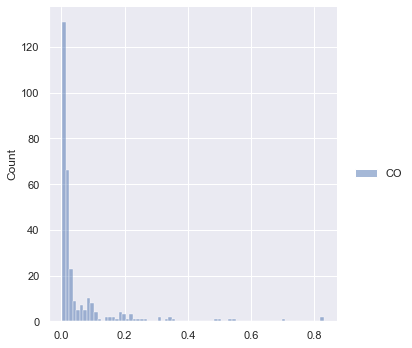

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

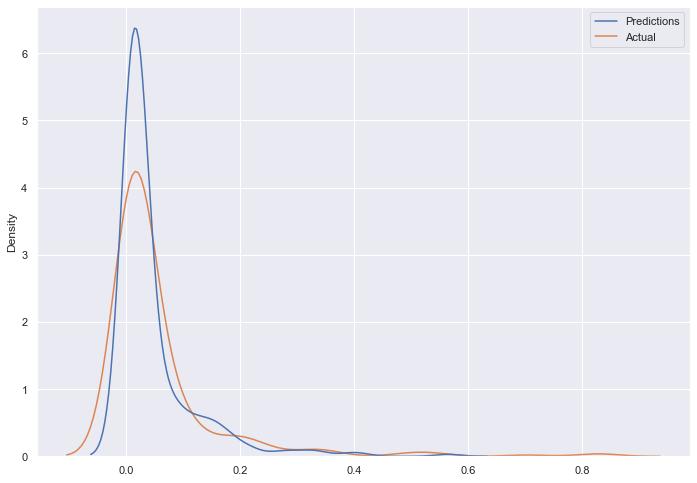

In [109]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [110]:
data_ozone = pd.DataFrame()
data_ozone["month"] = rbu["month"]
data_ozone["week"] = rbu["week"]
data_ozone["week_day"] = rbu["week_day"]
data_ozone["Ozone"] = rbu["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,11,45,1,70.50
1,11,45,2,45.31
2,11,45,3,66.00
3,11,45,4,65.90
4,11,45,5,40.72


In [111]:
# shuffling the data set
data_ozone = shuffle(data_ozone, random_state=1).reset_index(drop=True)
data_ozone.head()

,month,week,week_day,Ozone
0,3,13,0,37.51
1,11,45,5,42.67
2,10,41,1,67.71
3,8,34,6,37.32
4,6,25,0,42.70


In [112]:
duplicate_ozone = data_ozone.copy()

In [113]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [114]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

In [116]:
rbu_ozone_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [117]:
predictions_ozone = rbu_ozone_knn.predict(X_test)

In [118]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9950570958418131


In [119]:
predictions_ozone.shape

(304,)

In [120]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.012601
dtype: float64

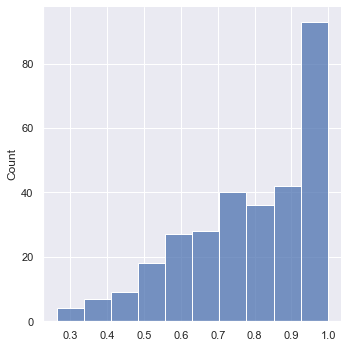

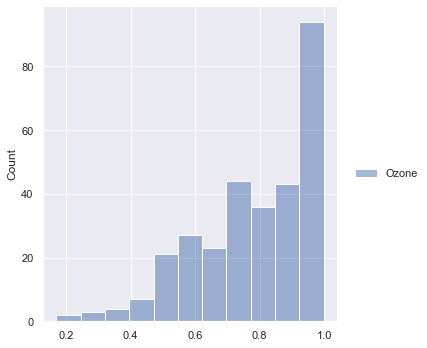

In [121]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

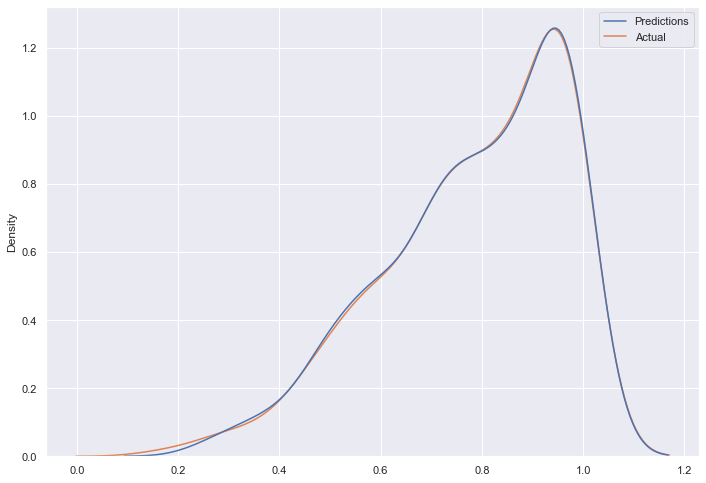

In [122]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [123]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [124]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [125]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [126]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [127]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],rbu_pm25_knn,rbu_pm10_model_knn,rbu_no2_knn,rbu_nh3_knn,rbu_so2_knn,rbu_co_knn,rbu_ozone_knn,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [31.51990646]
PM 10: [60.64251303]
NO2: [17.04104866]
NH3: [9.47989154]
SO2: [7.91586876]
CO: [0.21346161]
O3: [18.14210871]

The AQI value is expected to be around 60.64 and the index is expected to be Satisfactory
